### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,classification_report
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingRegressor

### Reading the DataSet

In [2]:
movie_data=pd.read_csv("IMDb Movies India.csv",encoding='ISO-8859-1')

In [3]:
movie_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
movie_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

### Data Preprocessing

In [6]:
movie_data_new=movie_data[['Name','Genre','Rating','Votes','Director','Actor 1','Actor 2','Actor 3']]

In [7]:
movie_data_new_copy = movie_data_new.copy()

# Split genres and extract the first one
genres = movie_data_new_copy['Genre'].str.split(',').str[0]

# Assign the new genre to the DataFrame
movie_data_new_copy.loc[:, 'Genre'] = genres

# Replace 'Music' with 'Musical' in the 'Genre' column
movie_data_new_copy.loc[movie_data_new_copy['Genre'] == 'Music', 'Genre'] = 'Musical'
movie_data_new_copy.loc[movie_data_new_copy['Genre'] == 'Mystery','Genre']='Thriller'
movie_data_new_copy.loc[movie_data_new_copy['Genre'] == 'Reality-TV','Genre']='Drama'
movie_data_new_copy.loc[movie_data_new_copy['Genre'] == 'War','Genre']='Action'
# Check the value counts of the 'Genre' column
print(movie_data_new_copy['Genre'].value_counts())


Drama          4519
Action         3495
Comedy         1561
Thriller        934
Romance         762
Crime           459
Horror          403
Documentary     383
Adventure       252
Fantasy         192
Musical         181
Family          161
Biography       155
Animation       125
History          29
Sport            11
Sci-Fi           10
Name: Genre, dtype: int64


In [8]:
movie_data_new_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Genre     13632 non-null  object 
 2   Rating    7919 non-null   float64
 3   Votes     7920 non-null   object 
 4   Director  14984 non-null  object 
 5   Actor 1   13892 non-null  object 
 6   Actor 2   13125 non-null  object 
 7   Actor 3   12365 non-null  object 
dtypes: float64(1), object(7)
memory usage: 969.4+ KB


In [9]:
movie_data_new_copy.dropna(subset=["Director"], inplace=True)

In [10]:
indices_to_delete = movie_data_new_copy[movie_data_new_copy['Votes'] == "$5.16M"].index
movie_data_new_copy.drop(indices_to_delete, inplace=True)

In [11]:
movie_data_new_copy['Votes'] = movie_data_new_copy['Votes'].str.replace(',', '')

# Convert the 'Votes' column to float datatype
movie_data_new_copy['Votes'] = movie_data_new_copy['Votes'].astype(float)

In [12]:
tnf1=ColumnTransformer(transformers=[('Average',SimpleImputer(),[2,3])
                                   ,("Missing",SimpleImputer(),[3])],remainder='passthrough')

In [13]:
movie_data_final=pd.DataFrame(tnf1.fit_transform(movie_data_new_copy))
movie_data_final.drop(columns=[1],inplace=True)



In [14]:
movie_data_final

,0,2,3,4,5,6,7,8
0,5.841256,1939.739196,,Drama,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,7.0,8.0,#Gadhvi (He thought he was Gandhi),Drama,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,5.841256,1939.739196,#Homecoming,Drama,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,4.4,35.0,#Yaaram,Comedy,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,5.841256,1939.739196,...And Once Again,Drama,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...
14978,5.8,44.0,Zulm Ki Zanjeer,Action,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
14979,4.6,11.0,Zulm Ko Jala Doonga,Action,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
14980,4.5,655.0,Zulmi,Action,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
14981,5.841256,1939.739196,Zulmi Raj,Action,Kiran Thej,Sangeeta Tiwari,NaN,NaN


In [15]:
# Define a dictionary mapping old column names to new column names
new_column_names = {
    0: 'Rating',
    2: 'Voters',
    3:'Name',
    4:'Genre',
    5:'Director',
    6:'Actor 1',
    7:'Actor 2',
    8:'Actor 3'
    # Add more mappings as needed
}

# Rename the columns using the dictionary
movie_data_final.rename(columns=new_column_names, inplace=True)


In [16]:
movie_data_final['Genre']=movie_data_final['Genre'].dropna()

In [17]:
movie_data_final=movie_data_final.dropna(subset=['Genre','Actor 1','Actor 2'])

In [18]:
movie_data_final.isnull().sum()

Rating        0
Voters        0
Name          0
Genre         0
Director      0
Actor 1       0
Actor 2       0
Actor 3     560
dtype: int64

In [19]:

actor_counts = movie_data_final[['Actor 1', 'Actor 2']].apply(pd.Series.value_counts)

#the actors that appear only once
actors_to_remove = actor_counts[actor_counts <= 1].dropna().index

# Filtering the rows where any of the actors appear only once
movie_data_final= movie_data_final[~movie_data_final[['Actor 1', 'Actor 2']].isin(actors_to_remove).any(axis=1)]



In [20]:
movie_data_final.isnull().sum()

Rating        0
Voters        0
Name          0
Genre         0
Director      0
Actor 1       0
Actor 2       0
Actor 3     514
dtype: int64

In [21]:
movie_data_final=movie_data_final.drop(columns=['Actor 2','Actor 3'])

In [22]:
movie_data_final

,Rating,Voters,Name,Genre,Director,Actor 1
0,5.841256,1939.739196,,Drama,J.S. Randhawa,Manmauji
1,7.0,8.0,#Gadhvi (He thought he was Gandhi),Drama,Gaurav Bakshi,Rasika Dugal
2,5.841256,1939.739196,#Homecoming,Drama,Soumyajit Majumdar,Sayani Gupta
3,4.4,35.0,#Yaaram,Comedy,Ovais Khan,Prateik
4,5.841256,1939.739196,...And Once Again,Drama,Amol Palekar,Rajat Kapoor
...,...,...,...,...,...,...
14977,5.841256,1939.739196,Zulm Ki Pukar,Action,Dinesh-Ramanesh,Ramesh Puri
14978,5.8,44.0,Zulm Ki Zanjeer,Action,S.P. Muthuraman,Chiranjeevi
14979,4.6,11.0,Zulm Ko Jala Doonga,Action,Mahendra Shah,Naseeruddin Shah
14980,4.5,655.0,Zulmi,Action,Kuku Kohli,Akshay Kumar


### Data Visualisation

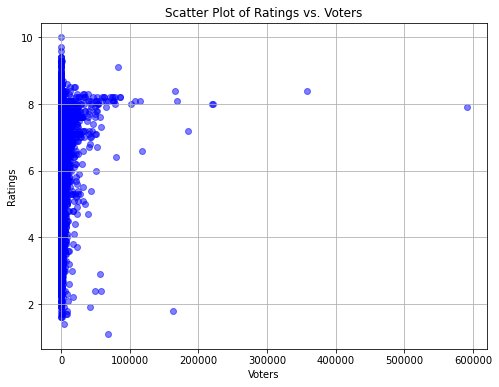

In [23]:
#scatter plot of Ratings Vs Voters
ratings = movie_data_final['Rating']
voters = movie_data_final['Voters']

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(voters, ratings, color='blue', alpha=0.5)
plt.title('Scatter Plot of Ratings vs. Voters')
plt.xlabel('Voters')
plt.ylabel('Ratings')
plt.grid(True)
plt.show()

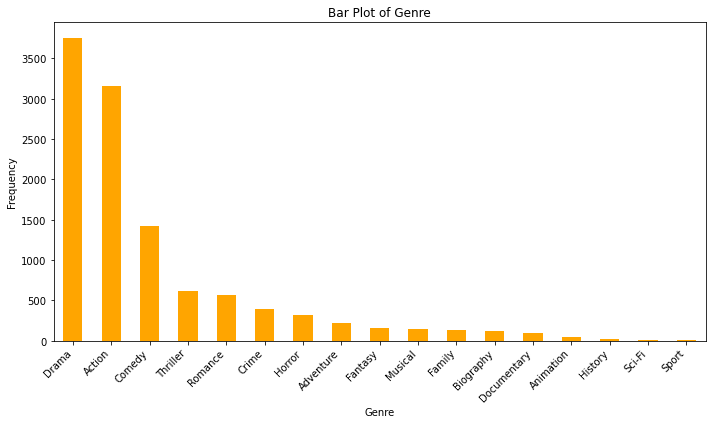

In [24]:
#Histograph for various Genre Available
genre_counts = movie_data_final['Genre'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='orange')
plt.title('Bar Plot of Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

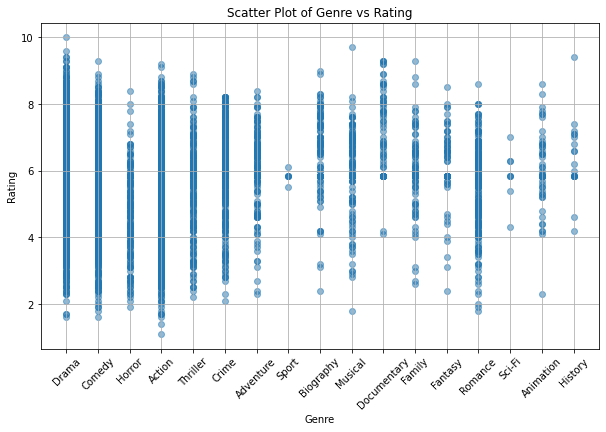

In [38]:
#scatter plot of Rating vs Genre
plt.figure(figsize=(10, 6))
plt.scatter(movie_data_final['Genre'], movie_data_final['Rating'], alpha=0.5)
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Scatter Plot of Genre vs Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(True)
plt.show()

Text(0, 0.5, 'Voters')

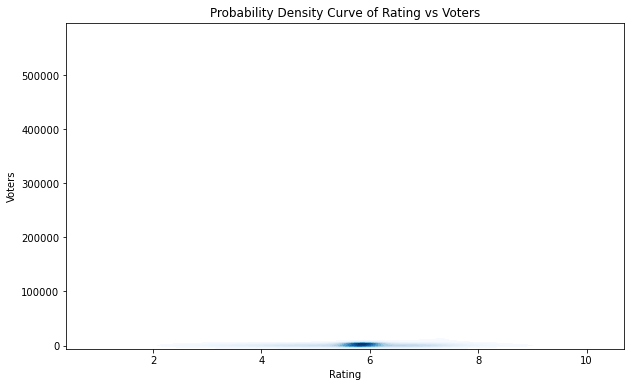

In [25]:
#Probabilty Density Curve
plt.figure(figsize=(10, 6))

# Plot KDE plot for 'Rating' vs 'Voters'
sns.kdeplot(data=movie_data_final, x='Rating', y='Voters', fill=True, cmap='Blues', levels=30)

# Add title and labels
plt.title('Probability Density Curve of Rating vs Voters')
plt.xlabel('Rating')
plt.ylabel('Voters')

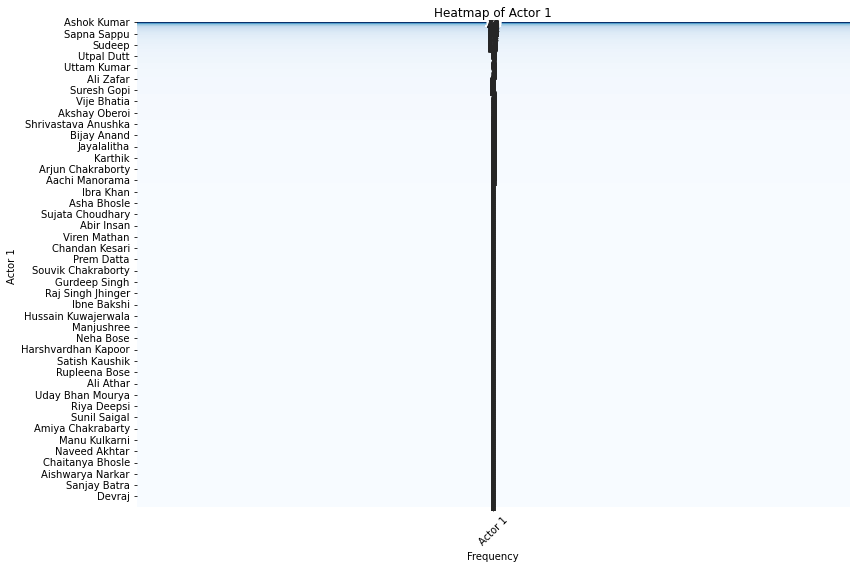

In [36]:
actor_counts = movie_data_final['Actor 1'].value_counts()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(actor_counts.to_frame(), cmap='Blues', annot=True, fmt='d', cbar=False)
plt.title('Heatmap of Actor 1')
plt.xlabel('Frequency')
plt.ylabel('Actor 1')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

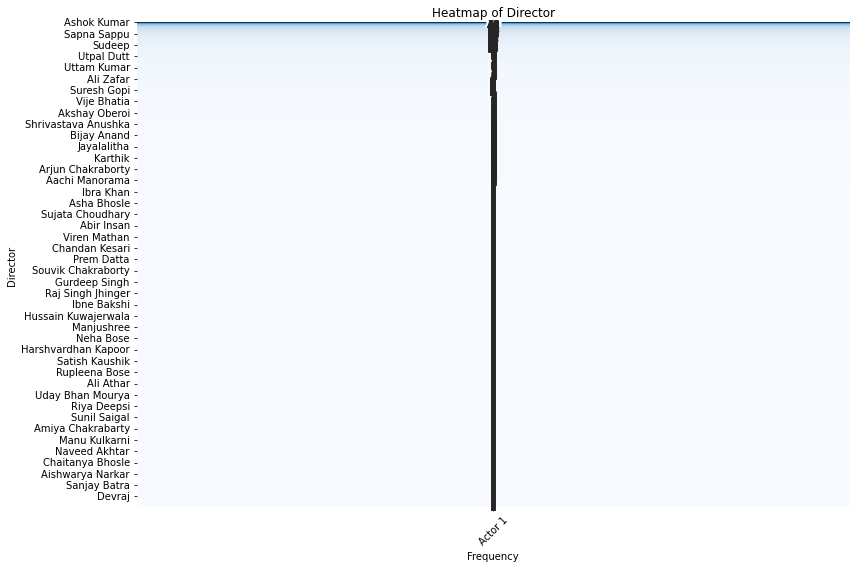

In [37]:
director_counts = movie_data_final['Director'].value_counts()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(actor_counts.to_frame(), cmap='Blues', annot=True, fmt='d', cbar=False)
plt.title('Heatmap of Director')
plt.xlabel('Frequency')
plt.ylabel('Director')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Data Split

In [27]:
x=movie_data_final['Voters'].values
y=movie_data_final['Rating'].values
x=x.reshape(-1,1)
y=y.reshape(-1,1)
x=x.astype(float)
y=y.astype(float)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

### Model Fitting

Linear Regression

In [29]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [30]:
mean_absolute_error(y_test, y_pred)

0.7145980005575672

Random Forest Regressor

In [31]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

C:\Users\aasth\AppData\Local\Temp\ipykernel_1840\2083383098.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


In [32]:
mean_absolute_error(y_test,y_pred)

0.7236023644241044

Gradient Boosting Regressor

In [33]:
gb=RandomForestRegressor()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

C:\Users\aasth\AppData\Local\Temp\ipykernel_1840\3029815917.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  gb.fit(x_train,y_train)


In [34]:
mean_absolute_error(y_test,y_pred)

0.7218717953362249